In [3]:
%%capture
%run common.ipy
from fns import ColumnRename, MatrixToDataFrame,DateTransform

![](pipeline.png)

![](dataflow.png)

# Load Data

In [2]:
X_train = pd.read_csv('data/casos_nacionales_covid-19_2020_semestre1.csv')
#X_train_2 = pd.read_csv('data/casos_nacionales_covid-19_2021_semestre1.csv')
#X_train   = pd.concat([X_train_1, X_train_2], axis= 1)
X_test    = pd.read_csv('data/casos_nacionales_covid-19_2022_semestre1.csv')

In [3]:
X_train.drop('Unnamed: 0', axis =1, inplace = True)
X_test.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
columnas = X_train.columns.tolist()

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176044 entries, 0 to 176043
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   fecha_actualizacion    176044 non-null  object
 1   id_registro            176044 non-null  object
 2   origen                 176044 non-null  object
 3   sector                 176044 non-null  object
 4   entidad_um             176044 non-null  object
 5   sexo                   176044 non-null  object
 6   entidad_nac            176044 non-null  object
 7   entidad_res            36020 non-null   object
 8   municipio_res          36019 non-null   object
 9   tipo_paciente          176044 non-null  object
 10  fecha_ingreso          176044 non-null  object
 11  fecha_sintomas         176044 non-null  object
 12  fecha_def              16236 non-null   object
 13  intubado               176044 non-null  object
 14  neumonia               176044 non-null  object
 15  

In [6]:
X_train.head(4)

,fecha_actualizacion,id_registro,origen,sector,entidad_um,sexo,entidad_nac,entidad_res,municipio_res,tipo_paciente,...,otro_caso,toma_muestra_lab,resultado_lab,toma_muestra_antigeno,resultado_antigeno,clasificacion_final,migrante,pais_nacionalidad,pais_origen,uci
0,2021-11-29,z4e838,USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,MÉXICO,MÉXICO,TEPOTZOTLÁN,HOSPITALIZADO,...,NO ESPECIFICADO,SI,NO POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO ESPECIFICADO,MÉXICO,NO APLICA,NO
1,2021-11-29,z2b144,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,MÉXICO,NaN,NaN,AMBULATORIO,...,SI,SI,RESULTADO NO ADECUADO,NO,NO APLICA (CASO SIN MUESTRA),NO REALIZADO POR LABORATORIO,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
2,2021-11-29,z3d1e2,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NaN,NaN,AMBULATORIO,...,SI,SI,POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),CASO DE SARS-COV-2 CONFIRMADO,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
3,2021-11-29,z23c2e,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NaN,NaN,AMBULATORIO,...,NO,NO,NO APLICA (CASO SIN MUESTRA),NO,NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA


In [7]:
#X_train[i].head(4)

In [8]:
# for i in X_train.select_dtypes(include=['object']).columns.tolist():
#     try:
#         print(i,X_train[i].unique())
#     except Exception as e:
#         print(e)

In [9]:
#fig, ax = plt.subplots(figsize=(10,10))
#plt.barh(X_train.columns.tolist(), X_train.isna().sum());

# Install Nightly `sklearn`

- https://scikit-learn.org/stable/developers/advanced_installation.html
- `pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn --upgrade`

In [10]:
#!pip list | grep scikit

# Notes

- Every step in a Pipeline produces a new DataFrame or Matrix
- Every step in a Column Transformer is adding a new column to that new DataFrame or Matrix produced by the Pipeline

# date transform

In [14]:
datapipe = Pipeline(steps=[
    ('dates',DateTransform()),
])

# Transform

In [15]:
X_tr = datapipe.fit_transform(X_train)
X_ts = datapipe.transform(X_test)

In [16]:
X_tr['fecha_ingreso_vs_sintomas'].mean()

3.9674854013769285

# Column Transformers

In [19]:
imputer = ColumnTransformer([
    ('drop_features', 'drop', ['fecha_actualizacion','id_registro','entidad_res','municipio_res','pais_origen','pais_nacionalidad']),
    #('impute_mean', SimpleImputer(strategy='mean'), ['age', 'sib_sp', 'parch', 'fare']),
    #('impute_mode', SimpleImputer(strategy='most_frequent'), ['p_class', 'sex', 'embarked']),
], remainder='passthrough', verbose_feature_names_out=False)

In [20]:
deleter = ColumnTransformer([
    ('drop_features2', 'drop', ['fecha_sintomas','fecha_ingreso','fecha_def']),
    #('impute_mean', SimpleImputer(strategy='mean'), ['age', 'sib_sp', 'parch', 'fare']),
    #('impute_mode', SimpleImputer(strategy='most_frequent'), ['p_class', 'sex', 'embarked']),
], remainder='passthrough', verbose_feature_names_out=False)

In [21]:
columnas_encoder = ['origen', 'sector', 'entidad_um', 'sexo', 'entidad_nac', 'tipo_paciente', 'intubado', 'neumonia', 'nacionalidad', 'embarazo', 'habla_lengua_indig', 'indigena', 'diabetes', 'epoc', 'asma', 'inmusupr', 'hipertension', 'otra_com', 'cardiovascular', 'obesidad', 'renal_cronica', 'tabaquismo', 'otro_caso', 'toma_muestra_lab', 'resultado_lab', 'toma_muestra_antigeno', 'resultado_antigeno', 'clasificacion_final', 'migrante', 'uci','tipo_paciente']

In [22]:
encoder = ColumnTransformer([
    #('ord_enc', OrdinalEncoder(categories=[['one', 'two', 'three']], handle_unknown='use_encoded_value', unknown_value=3), ['p_class']),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'), columnas_encoder[:5])
], remainder='passthrough', verbose_feature_names_out=False)

In [23]:
poly = ColumnTransformer([
    ('poly', PolynomialFeatures(include_bias=False, degree=3), ['fare'])
], remainder='passthrough', verbose_feature_names_out=False)

In [24]:
scalar = ColumnTransformer([
    ('robust', RobustScaler(), ['age', 'sib_sp', 'parch', 'fare', 'fare^2', 'fare^3'])
], remainder='passthrough', verbose_feature_names_out=False)

# Pipelines

In [25]:
datapipe = Pipeline(steps=[
    #('rename', ColumnRename()),
    ('imputer', imputer),
    ('df1', MatrixToDataFrame(imputer)),
    #('dates',DateTransform()),
    ('deleter', deleter),
    ('df2', MatrixToDataFrame(deleter)),
    ('encoder', encoder),
    ('df3', MatrixToDataFrame(encoder)),
])

# Transform X

In [26]:
X_tr2 = datapipe.fit_transform(X_tr)
X_ts2 = datapipe.transform(X_ts)

In [27]:
X_tr2['fecha_ingreso_vs_sintomas'].mean()

3.9674854013769285

In [28]:
columnas_onehot = []
for i in X_tr2.columns:
    if i not in ['edad', 'fecha_ingreso_vs_sintomas']:
        if i not in columnas_encoder:
            columnas_onehot.append(i)

In [29]:
#print(columnas_onehot)

In [30]:
c_vals, p_vals = chi2(X_tr2[columnas_onehot], y_train)

In [31]:
df_select1 =pd.DataFrame({'columnas': columnas_onehot,'pvals':p_vals}).sort_values(by='pvals')
columnas_onehot_1 = df_select1[df_select1['pvals'] >df_select1['pvals'].quantile(.25)]['columnas'].values.tolist()
columnas_onehot_2 = df_select1[df_select1['pvals'] <df_select1['pvals'].quantile(.25)]['columnas'].values.tolist()

In [33]:
#df_select1[df_select1['pvals'] <df_select1['pvals'].quantile(.25)].sort_values(by ='pvals')

# PIPELINE 2

In [34]:
encoder2 = ColumnTransformer([
    ('one_hot2', OneHotEncoder(handle_unknown='ignore'), columnas_encoder[6:])
], remainder='passthrough', verbose_feature_names_out=False)

In [35]:
datapipe2 = Pipeline(steps=[
    ('encoder2', encoder2),
    ('df4', MatrixToDataFrame(encoder2)),
])

# TRANSFORMER 2

In [36]:
X_tr3 = datapipe2.fit_transform(X_tr2)
X_ts3 = datapipe2.transform(X_ts2)

In [37]:
columnas_onehot2 = []
for i in X_tr3.columns:
    if i not in ['edad', 'fecha_ingreso_vs_sintomas']:
        if i not in columnas_encoder:
            columnas_onehot2.append(i)

In [38]:
c_vals, p_vals = chi2(X_tr2[columnas_onehot], y_train)

In [39]:
y_train.value_counts()

True     159808
False     16236
Name: Supervivencia, dtype: int64

In [40]:
df_select2 =pd.DataFrame({'columnas': columnas_onehot,'pvals':p_vals,'c_vals':c_vals}).sort_values(by='pvals')
# columnas_onehot_3 = df_select2[df_select1['pvals'] >df_select2['pvals'].quantile(.30)]['columnas'].values.tolist()
# columnas_onehot_4 = df_select2[df_select1['pvals'] <df_select2['pvals'].quantile(.30)]['columnas'].values.tolist()

In [41]:
columnas_finales_drop = df_select2.iloc[8:].sort_values(by='c_vals', ascending=False).columnas.values.tolist()

In [42]:
X_tr3.shape

(176044, 159)

<BarContainer object of 79 artists>

<Figure size 1440x1440 with 1 Axes>

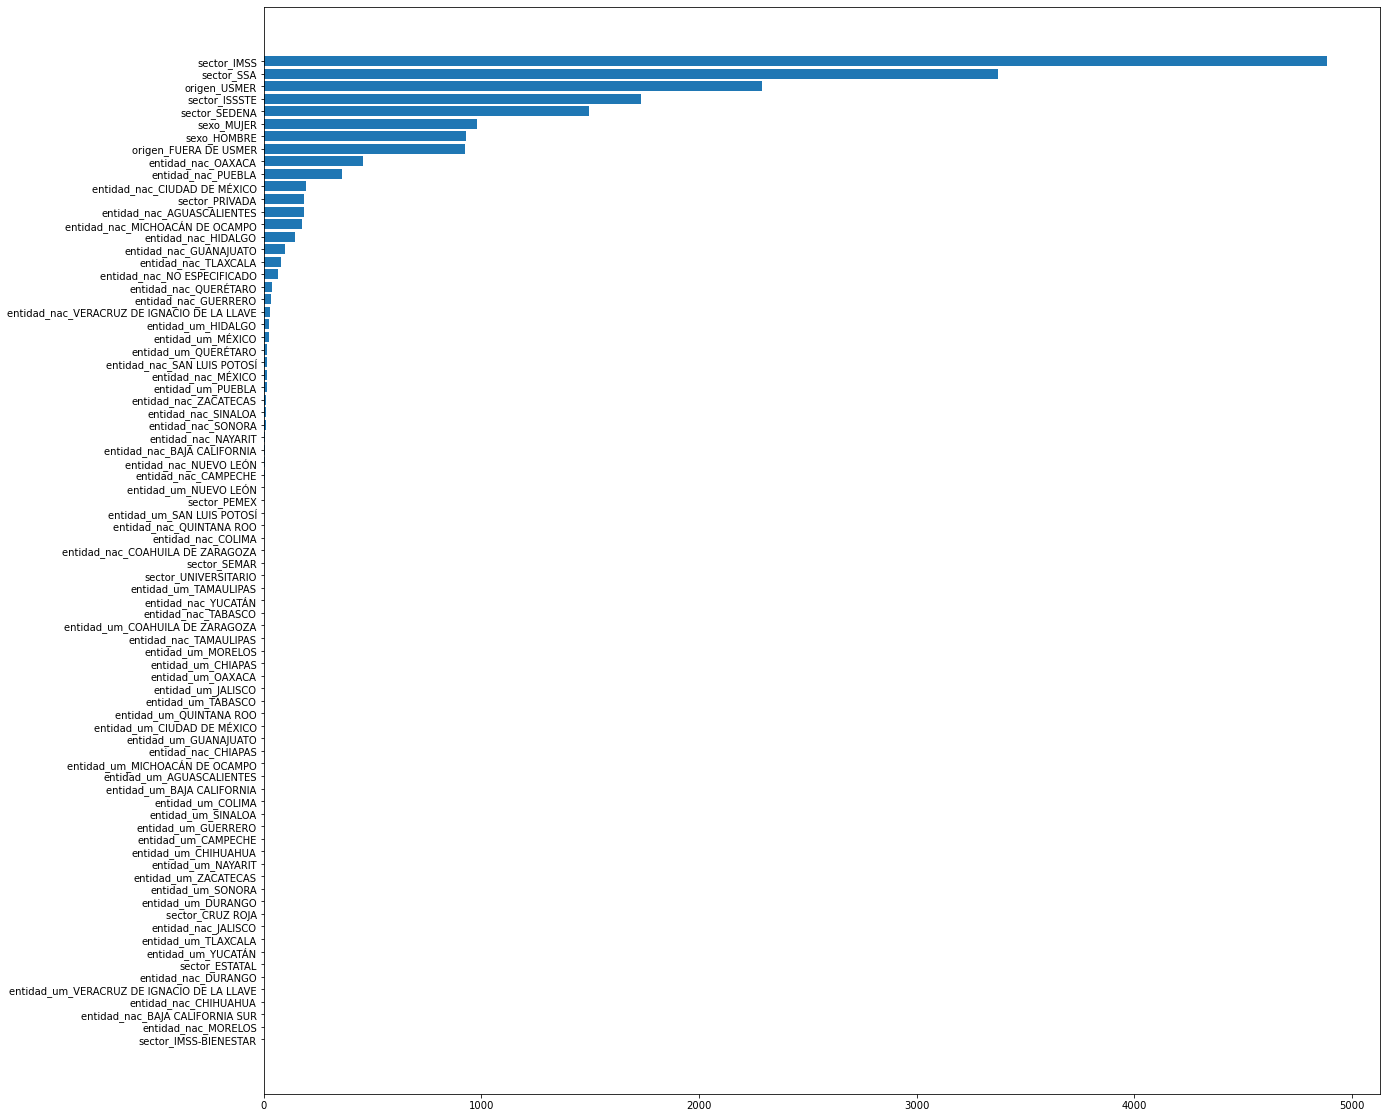

In [43]:
df_select3 = df_select2.sort_values(by= 'c_vals')
fig, ax = plt.subplots(figsize=(20,20))

plt.barh(df_select3['columnas'].values.tolist(), df_select3['c_vals'].values.tolist())

# Pipeline 3

In [44]:
deleter2 = ColumnTransformer([
    ('drop_features3', 'drop', columnas_finales_drop),
], remainder='passthrough', verbose_feature_names_out=False)

In [45]:
datapipe2 = Pipeline(steps=[
    ('deleter2', deleter2),
    ('df5', MatrixToDataFrame(deleter2)),
])

# Transformer 3

In [46]:
X_tr4 = datapipe2.fit_transform(X_tr3)
X_ts4 = datapipe2.transform(X_ts3)

In [17]:
X_tr['Supervivencia'] = X_tr['fecha_def'].isna() ==True
X_ts['Supervivencia'] = X_ts['fecha_def'].isna() ==True

In [18]:
y_train = X_tr['Supervivencia']
y_test = X_ts['Supervivencia']
X_tr.drop('Supervivencia', axis= 1, inplace = True)
X_ts.drop('Supervivencia', axis= 1, inplace = True)

In [47]:
y_train.value_counts()

True     159808
False     16236
Name: Supervivencia, dtype: int64

# Verify X

In [48]:
#X_tr['fecha_defuncion_vs_sintomas'].mean()

In [49]:
#X_tr['fecha_defuncion_vs_ingreso'].mean()

In [50]:
X_tr4['fecha_ingreso_vs_sintomas'].mean()

3.9674854013769285

In [51]:
X_tr4.shape

(176044, 88)

<AxesSubplot:>

<Figure size 720x720 with 1 Axes>

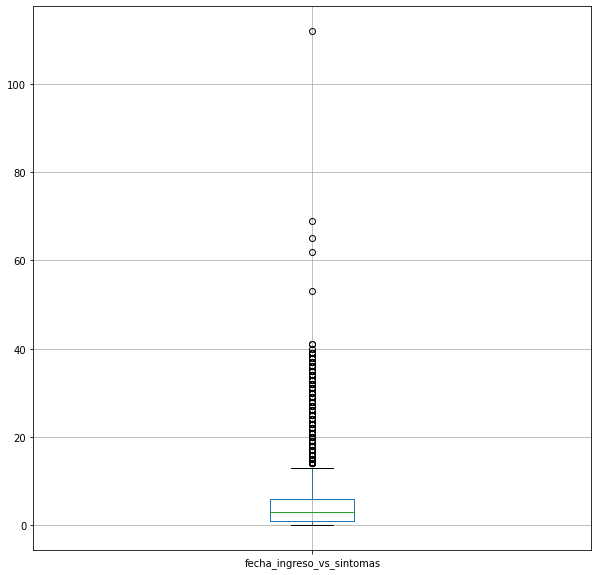

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
X_tr4.boxplot(column=['fecha_ingreso_vs_sintomas'])


In [53]:
#X_tr4.info()

In [54]:
X_tr4.shape, y_train.shape

((176044, 88), (176044,))

# Balance Data

In [55]:
sm = SMOTE(random_state=42)


In [56]:
X_res, y_res = sm.fit_resample(X_tr4, y_train)

In [57]:
y_res.value_counts()

False    159808
True     159808
Name: Supervivencia, dtype: int64

In [130]:
from imblearn.under_sampling import RandomUnderSampler
und = RandomUnderSampler(random_state=42)

In [131]:
X_res2, y_res2 = und.fit_resample(X_tr4, y_train)

In [132]:
y_res2.value_counts()

False    16236
True     16236
Name: Supervivencia, dtype: int64

# Dummy classifier

In [58]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_res, y_res)
prediccion_dummy = dummy_clf.predict(X_ts4)
print(accuracy_score(y_test, prediccion_dummy), precision_score(y_test, prediccion_dummy), recall_score(y_test, prediccion_dummy),f1_score(y_test, prediccion_dummy))

0.5000684031209335 0.9967939318869188 0.5000867365536383 0.6660296106744654


In [133]:
from sklearn.dummy import DummyClassifier
dummy_clf2 = DummyClassifier(strategy="uniform")
dummy_clf2.fit(X_res2, y_res2)
prediccion_dummy2 = dummy_clf2.predict(X_ts4)
print(accuracy_score(y_test, prediccion_dummy2), precision_score(y_test, prediccion_dummy2), recall_score(y_test, prediccion_dummy2),f1_score(y_test, prediccion_dummy2))

0.5002084927126051 0.9968470065160406 0.5002009213837445 0.666142722414335


In [60]:
X_ts=0
X_tr=0
X_tr2=0
X_ts2 =0
X_tr3 =0
X_ts3=0

In [63]:
model = LogisticRegression(max_iter=1000).fit(X_res,y_res)

In [103]:
model = DecisionTreeClassifier().fit(X_res,y_res)

In [106]:
prediccion_final = model.predict(X_ts4)
print(accuracy_score(y_test, prediccion_final), precision_score(y_test, prediccion_final), recall_score(y_test, prediccion_final),f1_score(y_test, prediccion_final))

0.97644524850033 0.998174871714433 0.9781588574490231 0.9880655049729835


In [135]:
model2 = DecisionTreeClassifier().fit(X_res2,y_res2)


In [136]:
prediccion_final2 = model2.predict(X_ts4)
print(accuracy_score(y_test, prediccion_final2), precision_score(y_test, prediccion_final2), recall_score(y_test, prediccion_final2),f1_score(y_test, prediccion_final2))

0.9131258475146684 0.9991762718254945 0.9136027070588184 0.9544753020039538


In [137]:
#grafico_final =pd.DataFrame({'features':X_res.columns, 'importancia':model.feature_importances_}).sort_values(by='importancia')
grafico_final2 =pd.DataFrame({'features':X_res2.columns, 'importancia':model2.feature_importances_}).sort_values(by='importancia')

<BarContainer object of 88 artists>

<Figure size 1440x1440 with 1 Axes>

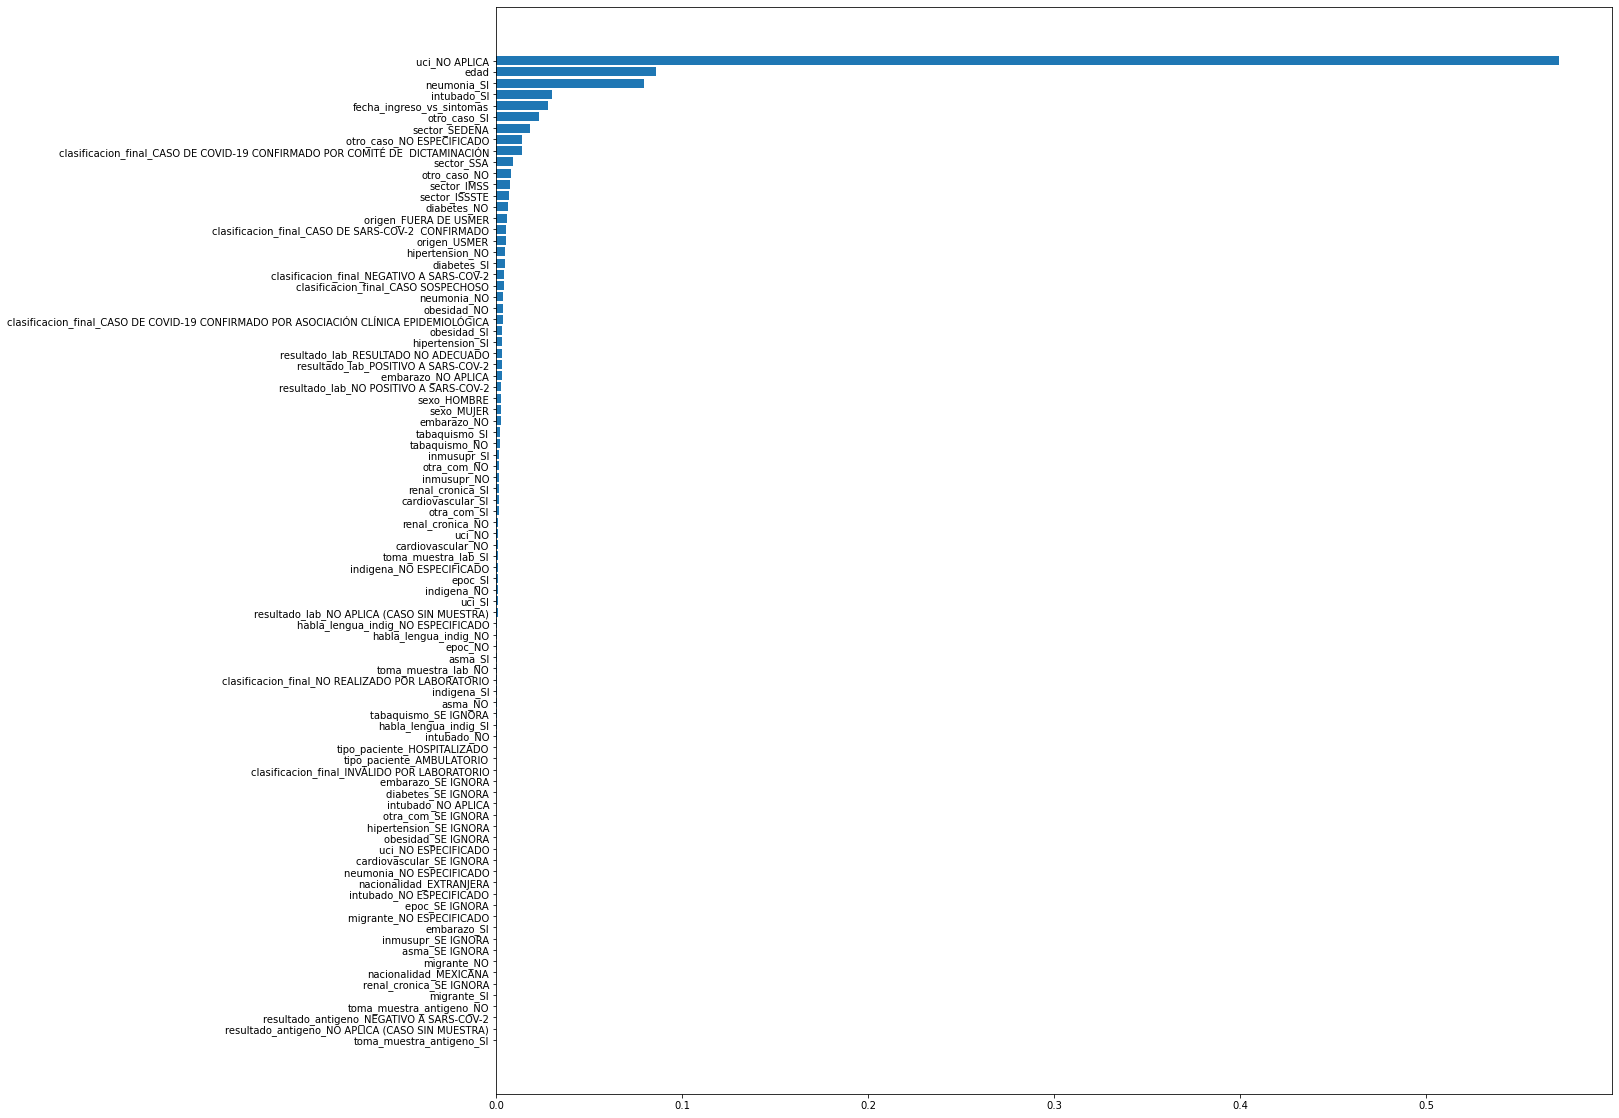

In [108]:
fig, ax = plt.subplots(figsize=(20,20))
plt.barh(grafico_final.features, grafico_final.importancia)


<BarContainer object of 88 artists>

<Figure size 1440x1440 with 1 Axes>

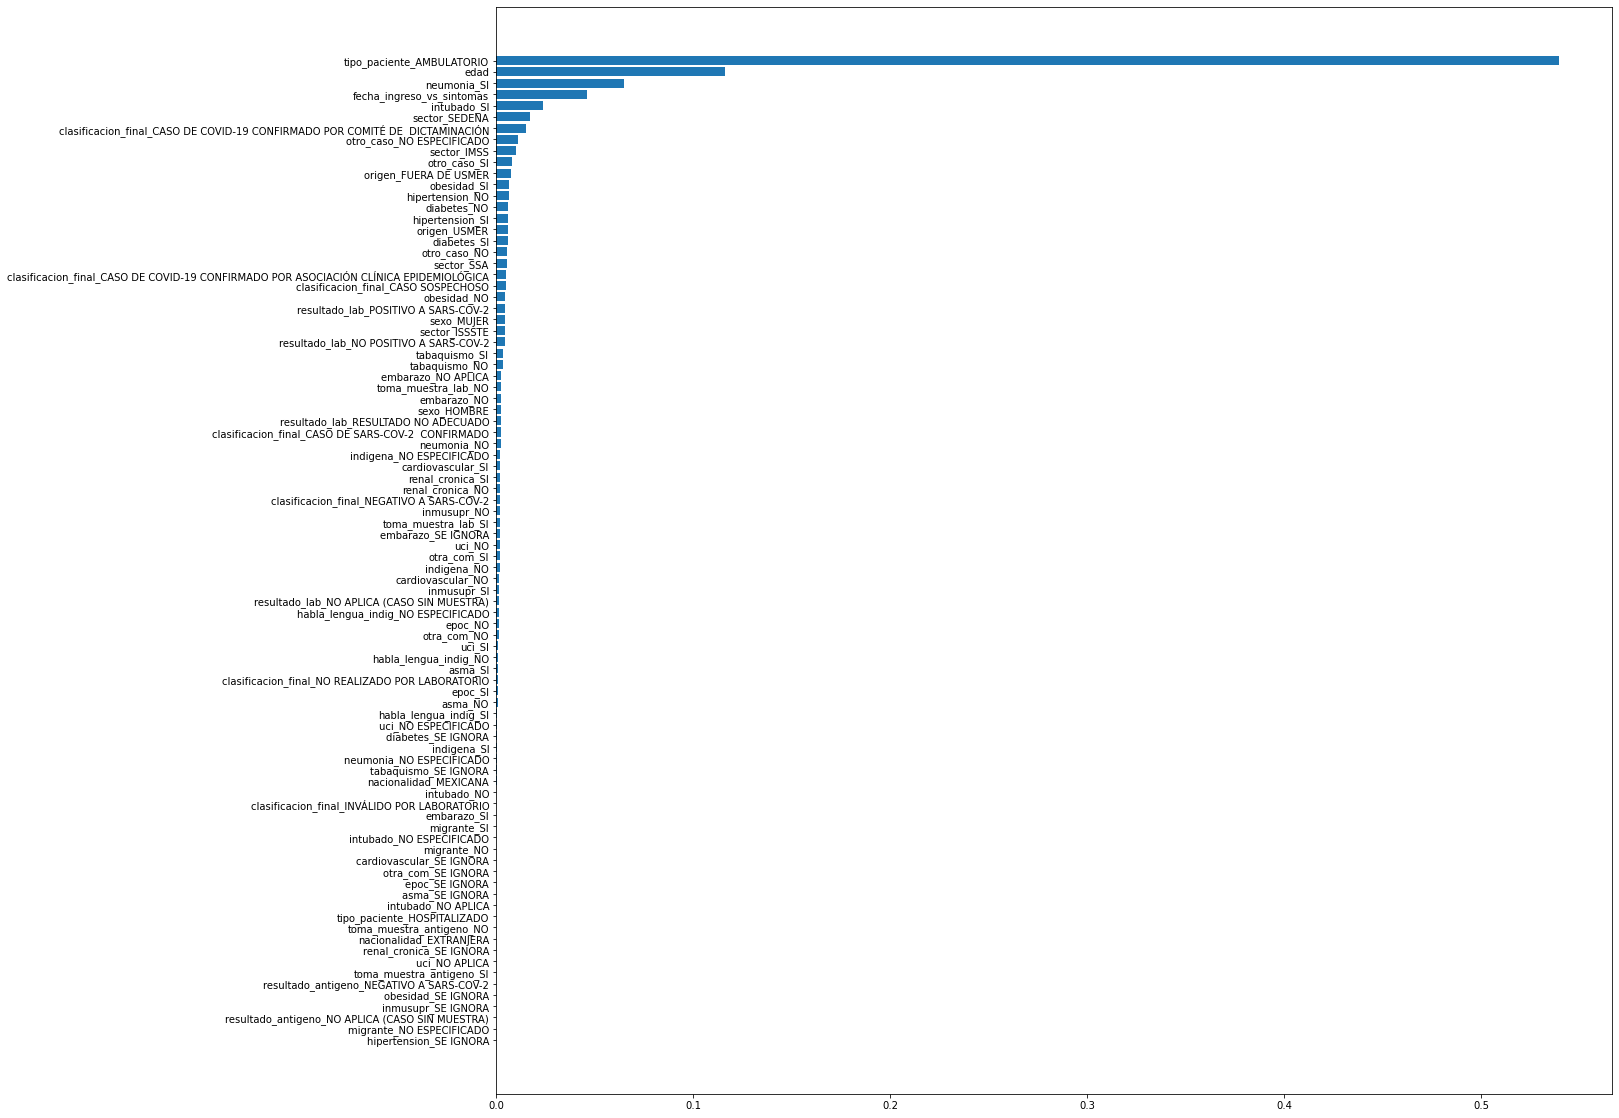

In [139]:
fig, ax = plt.subplots(figsize=(20,20))
plt.barh(grafico_final2.features, grafico_final2.importancia)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002312C0B8700>

<Figure size 432x288 with 2 Axes>

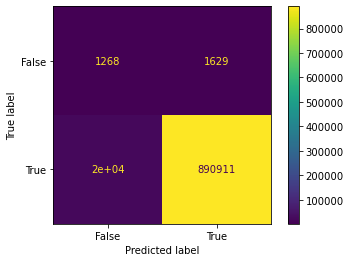

In [110]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_ts4, y_test) 

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002312D6FC970>

<Figure size 432x288 with 2 Axes>

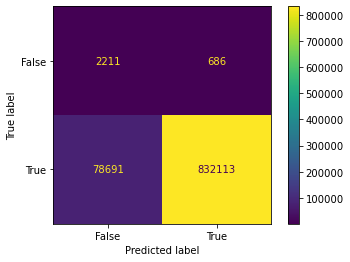

In [140]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model2, X_ts4, y_test) 

In [142]:
columnas_final2 = grafico_final2.iloc[-16:].features.values.tolist()
columnas_final2.remove('hipertension_NO')
#columnas_final.remove('diabetes_NO')
#columnas_final.remove('intubado_NO')
#columnas_final.remove('otro_caso_NO')
columnas_final2

[
    'origen_USMER',
    'hipertension_SI',
    'diabetes_NO',
    'obesidad_SI',
    'origen_FUERA DE USMER',
    'otro_caso_SI',
    'sector_IMSS',
    'otro_caso_NO ESPECIFICADO',
    'clasificacion_final_CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN',
    'sector_SEDENA',
    'intubado_SI',
    'fecha_ingreso_vs_sintomas',
    'neumonia_SI',
    'edad',
    'tipo_paciente_AMBULATORIO'
]

In [116]:
columnas_final = grafico_final.iloc[-16:].features.values.tolist()
#columnas_final.remove('hipertension_NO')
#columnas_final.remove('diabetes_NO')
#columnas_final.remove('intubado_NO')
columnas_final.remove('otro_caso_NO')
columnas_final

[
    'sector_ISSSTE',
    'sector_IMSS',
    'sector_SSA',
    'origen_FUERA DE USMER',
    'diabetes_NO',
    'otro_caso_NO ESPECIFICADO',
    'clasificacion_final_CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN',
    'clasificacion_final_CASO DE SARS-COV-2  CONFIRMADO',
    'sector_SEDENA',
    'otro_caso_SI',
    'intubado_SI',
    'fecha_ingreso_vs_sintomas',
    'neumonia_SI',
    'edad',
    'uci_NO APLICA'
]

In [117]:
X_tr5 = X_res[columnas_final].copy()
X_ts5 = X_ts4[columnas_final].copy()

In [151]:
X_tr6 = X_res2[columnas_final2].copy()
X_ts6 = X_ts4[columnas_final2].copy()

<BarContainer object of 15 artists>

<Figure size 720x720 with 1 Axes>

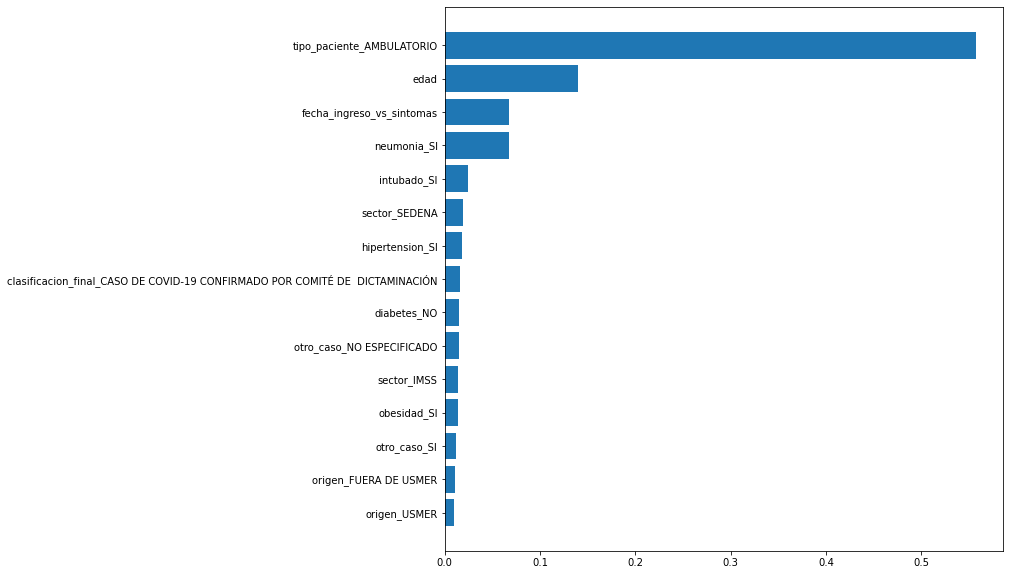

In [152]:
model = DecisionTreeClassifier().fit(X_tr6,y_res2)
grafico_final =pd.DataFrame({'features':X_tr6.columns, 'importancia':model.feature_importances_}).sort_values(by='importancia')
fig, ax = plt.subplots(figsize=(10,10))
plt.barh(grafico_final.features, grafico_final.importancia)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002312D66F130>

<Figure size 432x288 with 2 Axes>

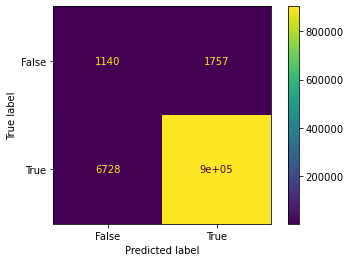

In [119]:
plot_confusion_matrix(model, X_ts5, y_test) 

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002314651A850>

<Figure size 432x288 with 2 Axes>

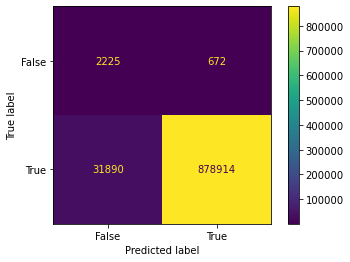

In [153]:
plot_confusion_matrix(model, X_ts6, y_test) 

In [154]:
X_tr6.to_csv('X_train2.csv')
y_res2.to_csv('y_train2.csv')
X_ts5.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

In [8]:
X_tr5= pd.read_csv('X_train.csv')
y_res= pd.read_csv('y_train.csv')
X_ts5 = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')



In [9]:
X_ts5.drop('Unnamed: 0', axis =1, inplace = True)
y_test.drop('Unnamed: 0', axis =1, inplace = True)
X_tr5.drop('Unnamed: 0', axis =1, inplace = True)
y_res.drop('Unnamed: 0', axis =1, inplace = True)

# GridSearch

In [251]:
parameters = {
    'n_estimators': [100,200],
    'max_depth': [4,8,10],
}

model = XGBClassifier()
gs = GridSearchCV(model, parameters, cv=5, n_jobs=-1, verbose=1, scoring='precision')
gs.fit(X_tr6, y_res2)
gs.best_score_, gs.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[13:00:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.9407918893040484, {'max_depth': 4, 'n_estimators': 100})

# Final Model

In [10]:
final = XGBClassifier(**{'max_depth': 8, 'n_estimators': 100}).fit(X_tr5, y_res)
prediccion_final = final.predict(X_ts5)
print(accuracy_score(y_test, prediccion_final), precision_score(y_test, prediccion_final), recall_score(y_test, prediccion_final),f1_score(y_test, prediccion_final))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[13:32:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9958542236464664 0.997869135731992 0.9979721213345571 0.997920625876241


In [253]:
final2 = XGBClassifier(**{'max_depth': 4, 'n_estimators': 100}).fit(X_tr6, y_res2)
prediccion_final3 = final.predict(X_ts6)
print(accuracy_score(y_test, prediccion_final3), precision_score(y_test, prediccion_final3), recall_score(y_test, prediccion_final3),f1_score(y_test, prediccion_final3))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[13:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8359736938013639 0.9991354553814951 0.8361755108673217 0.9104207572375086


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<Figure size 432x288 with 2 Axes>

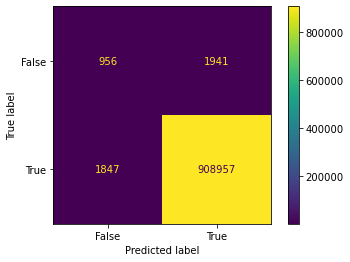

In [174]:
plot_confusion_matrix(final, X_ts5, y_test); 

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<Figure size 432x288 with 2 Axes>

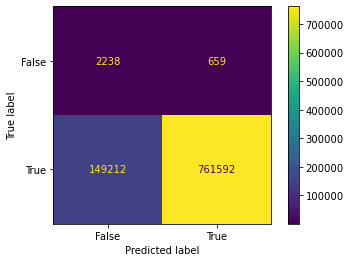

In [254]:
plot_confusion_matrix(final, X_ts6, y_test); 

In [180]:
probs_0and1 = final.predict_proba(X_ts5) # yes!
y_prob_Def = probs_0and1[:,1]

In [176]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_Def, pos_label=1)
auc = roc_auc_score(y_test, y_prob_Def) # note we are scoring on our training data!

<Figure size 720x576 with 1 Axes>

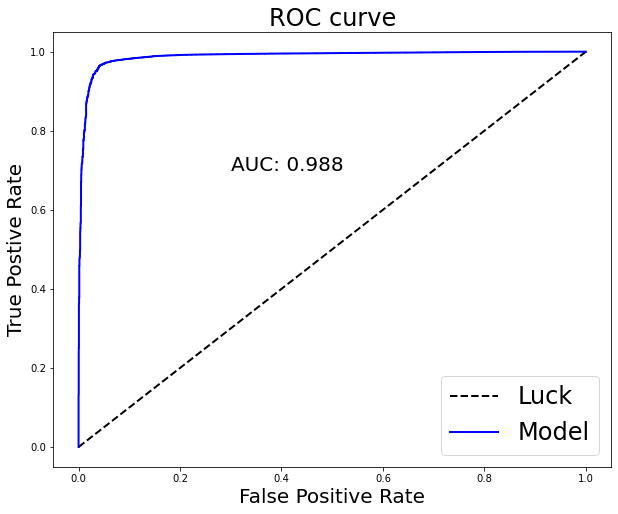

In [186]:
# Plot the ROC
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck')
ax.plot(fpr, tpr, color='b', lw=2, label='Model')
ax.set_xlabel("False Positive Rate", fontsize=20)
ax.set_ylabel("True Postive Rate", fontsize=20)
ax.set_title("ROC curve", fontsize=24)
ax.text(0.3, 0.7, " ".join(["AUC:",str(auc.round(3))]), fontsize=20)
ax.legend(fontsize=24);

3034.8

<Figure size 1440x1440 with 1 Axes>

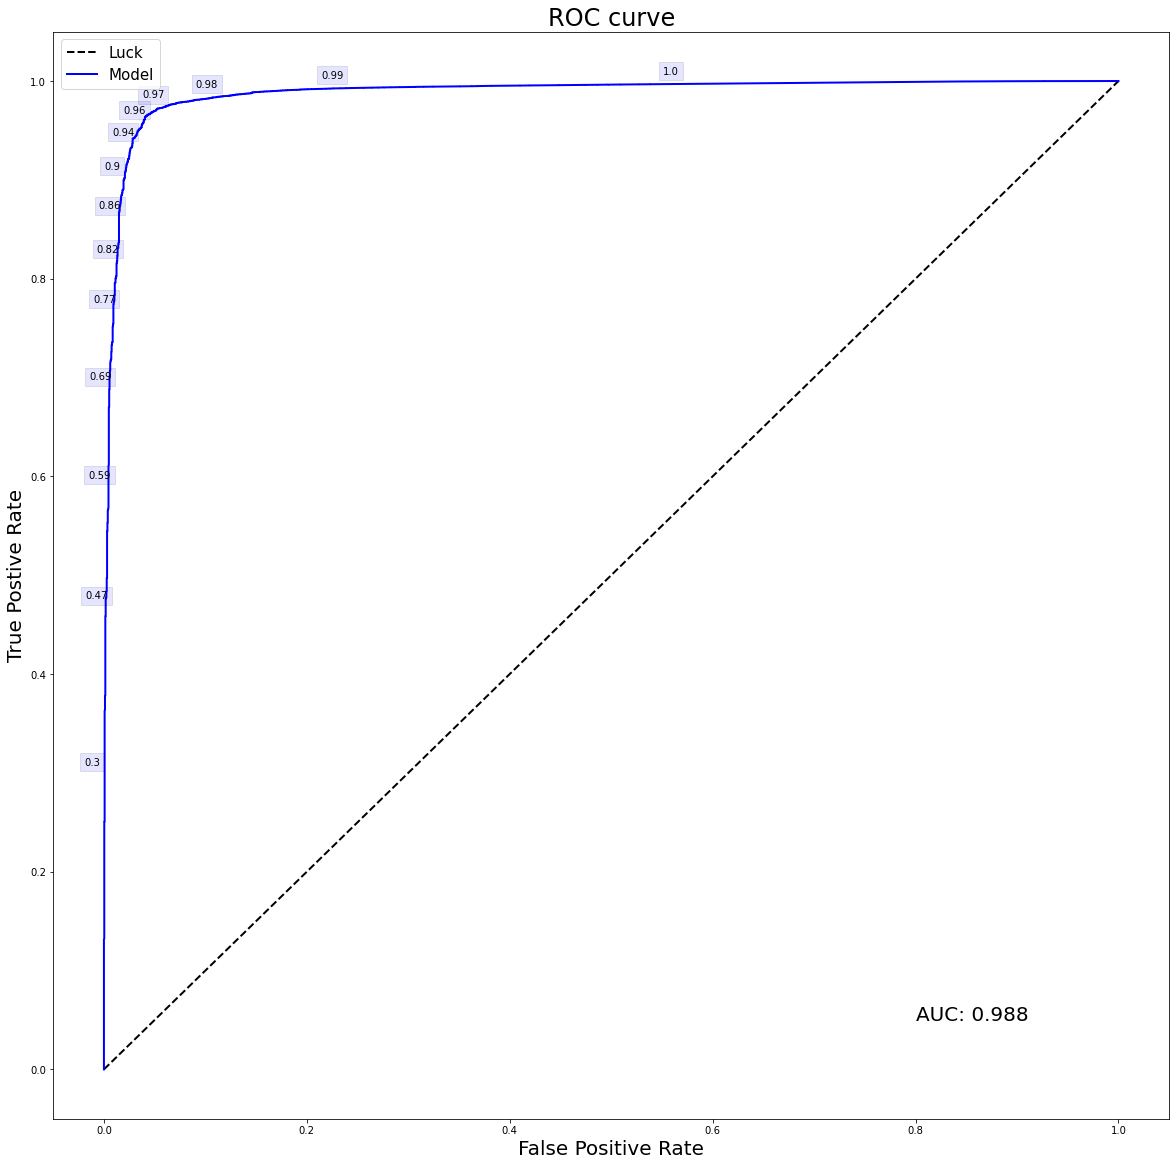

In [196]:
# Plot the ROC
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck')
ax.plot(fpr, tpr, color='b', lw=2, label='Model')
ax.set_xlabel("False Positive Rate", fontsize=20)
ax.set_ylabel("True Postive Rate", fontsize=20)
ax.set_title("ROC curve", fontsize=24)
ax.text(0.8, 0.05, " ".join(["AUC:",str(auc.round(3))]), fontsize=20)
ax.legend(fontsize=15);

skip = 0
for i, value in enumerate(tpr):
    if (skip < 2034):
        skip += 1
    else:
        ax.text(fpr[i]-0.02, tpr[i]+0.01, round(tpr[i], 2), fontsize=10, bbox={'facecolor': 'blue', 'alpha': 0.1, 'pad': 4})
        skip=0

In [246]:
result_proba = final.predict_proba(X_ts5)
result_boolean2= (result_proba[:,1] > .96) 
result_boolean2

array([ True, False,  True, ...,  True,  True,  True])

In [247]:
confusion_matrix(y_test, result_boolean2)

array([[  2713,    184],
       [ 22721, 888083]], dtype=int64)

In [248]:
confusion_matrix(y_test, prediccion_final)

array([[   956,   1941],
       [  1847, 908957]], dtype=int64)

In [249]:
y_test.value_counts()

True     910804
False      2897
Name: Supervivencia, dtype: int64

['sector_ISSSTE', 'sector_IMSS', 'sector_SSA', 'origen_FUERA DE USMER', 'diabetes_NO', 'otro_caso_NO ESPECIFICADO', 'clasificacion_final_CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN', 'clasificacion_final_CASO DE SARS-COV-2  CONFIRMADO', 'sector_SEDENA', 'otro_caso_SI', 'intubado_SI', 'fecha_ingreso_vs_sintomas', 'neumonia_SI', 'edad', 'uci_NO APLICA', 'supervivencia']


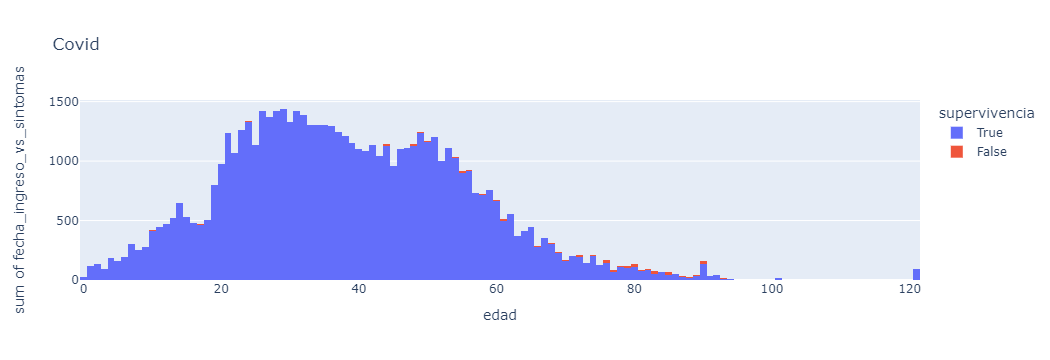

In [42]:
import plotly.express as px
data =X_ts5.copy()
data['supervivencia']= y_test
print(data.columns.tolist())

fig = px.histogram(data.sample(n=30000, random_state=1), x="edad", y="fecha_ingreso_vs_sintomas", color="supervivencia", title="Covid")
fig.show()

# End of Notebook

In [250]:
2713/2897

0.9364860200207111

In [43]:
import sklearn

In [ ]:
sklearn.v

'1.1.dev0'